In [2]:
import numpy as np
import qiskit as qk
from qiskit import Aer

In [3]:
def expectation(circuit,shots):
    simulator = Aer.get_backend('aer_simulator')
    result = simulator.run(circuit,shots=shots).result()
    counts = result.get_counts()
    
    #Get keys of dictionary
    keys = list(counts.keys())

    #Calculate expectation value of Z^n 
    expectation_value = 0
    for i in range(len(keys)):
        tmp = keys[i]

        #Extract number of zeros and ones
        num_zeros = tmp.count('0')
        num_ones = tmp.count('1')

        #Determine eigenvalue of operator
        eigenvalue = 1**num_zeros * (-1)**num_ones
        
        #Calculate expectation value
        expectation_value += eigenvalue * counts[tmp]/shots
        
    return expectation_value

In [4]:
def phi_ij(xi,xj):
    return (np.pi-xi)*(np.pi-xj)

def U1(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)

    circuit.s(1)
    circuit.s(1)
    return circuit


In [5]:
def U2(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)
    return circuit

In [6]:
def U3(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)
    return circuit

In [7]:
def U4(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[0],0)
    circuit.p(2*x[1],1)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[0],x[1]),1)
    circuit.cx(0,1)

    circuit.sdg(1)
    circuit.sdg(1)
    return circuit

In [8]:
def V1(x,n_part,circuit):
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.s(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.s(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1)
    return circuit


In [9]:
def V2(x,n_part,circuit):
    #Create circuit
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.s(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1)
    return circuit

In [10]:
def V3(x,n_part,circuit):
    #Create circuit
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.s(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1)
    return circuit

In [11]:
def V4(x,n_part,circuit):
    #Create circuit
    circuit.h(range(n_part))

    circuit.p(2*x[2],0)
    circuit.p(2*x[3],1)

    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)
    circuit.p(2*phi_ij(x[1],x[2]),0)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(0)

    circuit.cx(0,1)
    circuit.p(2*phi_ij(x[2],x[3]),1)
    circuit.cx(0,1) 
    return circuit

In [44]:
#Original circuit
x = np.array([0.6,0.8,0.3,0.8])
n_part = 2
d = 2
shots = 1000

U_partitioned = [U1,U2,U3,U4]
V_partitioned = [V1,V2,V3,V4]

def h_partitioned(x,n_part,d,shots):
    #Initialize circuit
    circuit1 = qk.QuantumCircuit(n_part,n_part)
    circuit2 = qk.QuantumCircuit(n_part,n_part)

    assert d<=2, "d must be smaller or equal to 2"

    expectation_value = 0
    if d == 1:
        combinations = [(i, i) for i in range(0,4)]
        for i in range(len(combinations)):
            circuit1 = U_partitioned[combinations[i][0]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1.z(range(n_part))
            circuit1.measure(range(n_part),range(n_part))

            circuit2 = V_partitioned[combinations[i][1]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2.z(range(n_part))
            circuit2.measure(range(n_part),range(n_part))

            expectation_1 = expectation(circuit1,shots)
            expectation_2 = expectation(circuit2,shots)

            expectation_value += expectation_1*expectation_2

    if d == 2:
        combinations = [((i, i), (j, j)) for i in range(0, 4) for j in range(0, 4)]
        for i in range(len(combinations)):
            circuit1 = U_partitioned[combinations[i][0][0]](x,n_part,circuit1)
            circuit1 = V_partitioned[combinations[i][0][1]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1.z(range(n_part))
            circuit1.measure(range(n_part),range(n_part))

            circuit2 = U_partitioned[combinations[i][1][0]](x,n_part,circuit2)
            circuit2 = V_partitioned[combinations[i][1][1]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2.z(range(n_part))
            circuit2.measure(range(n_part),range(n_part))

            expectation_1 = expectation(circuit1,shots)
            expectation_2 = expectation(circuit2,shots)

            expectation_value += expectation_1*expectation_2

    if expectation_value >= 0:
        h = 1
    else:
        h = -1
    return h

h_partitioned(x,n_part,d,shots)

1

[(0, 0, 0), (0, 0, 1), (1, 1, 0), (1, 1, 1), (2, 2, 0), (2, 2, 1), (3, 3, 0), (3, 3, 1)]


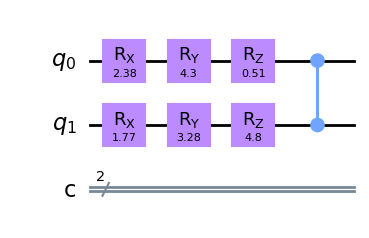

In [45]:
n=4
def theta_gate(qc,theta,i):
    assert len(theta) == 3, "theta incorrect size"
    qc.rx(theta[0],i)
    qc.ry(theta[1],i)
    qc.rz(theta[2],i)
    return 0

def W1(qc,theta, n, n_part, l=1):
    Theta_matrix = np.reshape(theta, (n,l,3))[0:2,:,:]
    for j in range(l):
        for i in range(n_part):
            theta_gate(qc,Theta_matrix[i,j,:],i)
    qc.cz(0,1)        
    return qc

def W2(qc,theta, n, n_part, l=1):
    Theta_matrix = np.reshape(theta, (n,l,3))[2:4,:,:]
    for j in range(l):
        for i in range(n_part):
            theta_gate(qc,Theta_matrix[i,j,:],i)
    return qc

def M1(qc,theta,n,n_part,l=1):
    return qc

def M2(qc,theta,n,n_part,l=1):
    qc.cz(0,1)   
    return qc

Theta = 2*np.pi*np.random.random(n*1*3)

W_partitioned = [W1,W2]
M_partitioned = [M1,M2]

combinations = [(i, i, j) for i in range(0, 4) for j in range(0, 2)]
print(combinations)

W1_test = W1(qk.QuantumCircuit(n_part,n_part),Theta,n,n_part)
W1_test.draw(output='mpl')

In [68]:
def testing_circuit(x,n,n_part,d,shots,theta):
    #Initialize circuit
    circuit1 = qk.QuantumCircuit(n_part,n_part)
    circuit2 = qk.QuantumCircuit(n_part,n_part)
    circuit3 = qk.QuantumCircuit(n_part,n_part)

    assert d<=2, "d must be smaller or equal to 2"

    expectation_value = 0
    if d == 1:
        combinations = [(i, i, j) for i in range(0,4) for j in range(0,2)]
        for i in range(len(combinations)):
            circuit1 = U_partitioned[combinations[i][0]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1.z(range(n_part))
            circuit1.measure(range(n_part),range(n_part))

            circuit2 = V_partitioned[combinations[i][1]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2.z(range(n_part))
            circuit2.measure(range(n_part),range(n_part))

            circuit3 = W_partitioned[combinations[i][2]](circuit3,theta,n,n_part)
            circuit3.barrier()
            circuit3.z(range(n_part))
            circuit3.measure(range(n_part),range(n_part))

            expectation_1 = expectation(circuit1,shots)
            expectation_2 = expectation(circuit2,shots)

            expectation_value += expectation_1*expectation_2

    if d == 2:
        combinations = [((i, i, k), (j, j, l)) for i in range(0, 4) for j in range(0, 4) for k in range(0,2) for l in range(0,2)]
        for i in range(len(combinations)):
            circuit1 = U_partitioned[combinations[i][0][0]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1 = V_partitioned[combinations[i][0][1]](x,n_part,circuit1)
            circuit1.barrier()
            circuit1 = W_partitioned[combinations[i][0][2]](circuit1,theta,n,n_part)
            circuit1.barrier()
            circuit1.z(range(n_part))
            circuit1.measure(range(n_part),range(n_part))

            circuit2 = U_partitioned[combinations[i][1][0]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2 = V_partitioned[combinations[i][1][1]](x,n_part,circuit2)
            circuit2.barrier()
            circuit2 = M_partitioned[combinations[i][1][2]](circuit2,theta,n,n_part)
            circuit2.barrier()
            circuit2.z(range(n_part))
            circuit2.measure(range(n_part),range(n_part))

            expectation_1 = expectation(circuit1,shots)
            expectation_2 = expectation(circuit2,shots)

            expectation_value += expectation_1*expectation_2

    if expectation_value >= 0:
        h = 1
    else:
        h = -1
    return h

In [73]:
test = testing_circuit(x,n,n_part,1,shots,Theta)
print(test)

-1


/home/pschaefers/master/QCQP/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


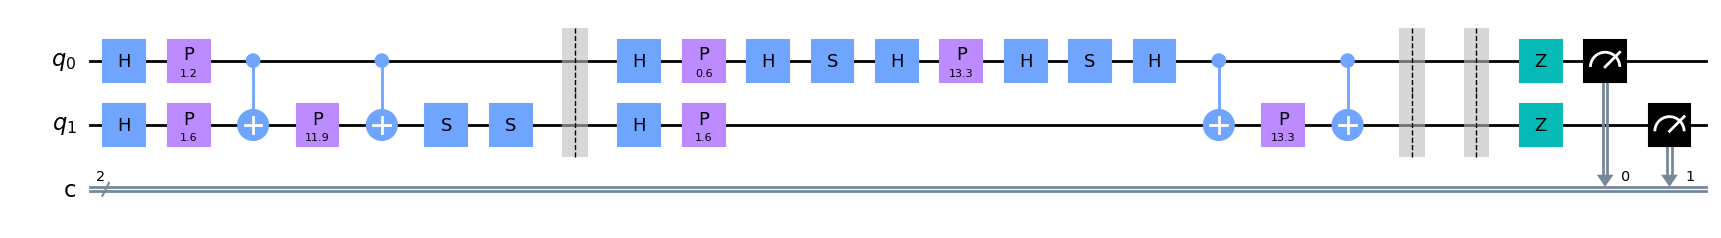

/home/pschaefers/master/QCQP/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


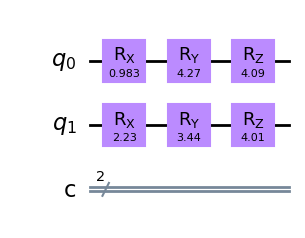

In [65]:
# U1(x,n_part,qk.QuantumCircuit(n_part,n_part)).draw(output='mpl')
# V1(x,n_part,qk.QuantumCircuit(n_part,n_part)).draw(output='mpl')
W2(qk.QuantumCircuit(n_part,n_part),Theta,n,n_part).draw(output='mpl')


In [67]:
print(len([((i, i, k), (j, j, l)) for i in range(0, 4) for j in range(0, 4) for k in range(0,2) for l in range(0,2)]))

64
